Dette er vores opgave 
1.    Find the most popular dance number with less speech content and medium loudness
2.    Witch 5 songs are the most popular with the liveliness and rated highest danceability
3.    Find a list attributes that makes some more og less popular
4.    What genre inbetween between 1999 og 2000 was most popular and what was the tempo in the song

In [2]:
# Here we import the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read all data from the file
df_music = pd.read_csv('raw_dataset.csv')

# Print first 5 rows of data
df_music.head

<bound method NDFrame.head of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceabilit

In [3]:
#medium loudness

mediumloudness = df_music['loudness'].quantile(0.75)-df_music['loudness'].quantile(0.25)
print(mediumloudness)


#lowspeechiness
lowestspeech = df_music['speechiness'].quantile(0.25)
print(lowestspeech)

#highdanceability
dancebiltyhigest = df_music['danceability'].quantile(0.75)
print(dancebiltyhigest)

df_filtereddata = df_music.loc[(df_music['loudness'] < mediumloudness) & (df_music['speechiness'] < lowestspeech) & (df_music['danceability'] > dancebiltyhigest)]

df_filtereddata.sort_values("popularity", ascending=False, inplace=True)
df_filtereddata.head()


2.3225
0.0396
0.764


C:\Users\tobia\AppData\Local\Temp\ipykernel_31388\53264059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtereddata.sort_values("popularity", ascending=False, inplace=True)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1306,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,248413,False,2013,83,0.794,0.811,6,-8.966,0,0.0380,0.04260,0.000001,0.1010,0.862,116.047,"hip hop, Dance/Electronic"
1501,Ed Sheeran,Thinking out Loud,281560,False,2014,81,0.781,0.445,2,-6.061,1,0.0295,0.47400,0.000000,0.1840,0.591,78.998,pop
1406,MAGIC!,Rude,224840,False,2014,80,0.773,0.758,1,-4.993,1,0.0381,0.04220,0.000000,0.3050,0.925,144.033,set()
702,Britney Spears,Gimme More,251240,False,2007,79,0.788,0.844,2,-3.131,1,0.0334,0.25000,0.000678,0.0723,0.382,113.324,pop
1280,Train,Drive By,195973,False,2012,77,0.765,0.837,1,-3.113,0,0.0320,0.00107,0.000011,0.0801,0.721,122.028,pop


In [4]:
# 2. Which 5 songs are the most popular with the liveliness and rated highest danceability
#highest liveness quantile

highliveliness = df_music['liveness'].quantile(0.75)
print(highliveliness)

# Highdanceability
dancebiltyhigest = df_music['danceability'].quantile(0.75)
print(dancebiltyhigest)

# Filter for high liveliness and high danceability
df_filtereddatanew = df_music.loc[(df_music['danceability'] > dancebiltyhigest) & (df_music['liveness'] > highliveliness)]

# Sort values in descending order of popularity
df_filtereddatanew.sort_values("popularity", ascending=False, inplace=True)
df_filtereddatanew.head()

0.241
0.764


C:\Users\tobia\AppData\Local\Temp\ipykernel_31388\3254845062.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtereddatanew.sort_values("popularity", ascending=False, inplace=True)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1601,Drake,One Dance,173986,False,2016,84,0.792,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.329,0.370,103.967,"hip hop, pop, R&B"
102,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.03710,0.000002,0.518,0.507,80.063,hip hop
1752,XXXTENTACION,Jocelyn Flores,119133,True,2017,83,0.872,0.391,0,-9.144,0,0.2420,0.46900,0.000004,0.297,0.437,134.021,hip hop
600,Shakira,Hips Don't Lie (feat. Wyclef Jean),218093,False,2005,82,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,"pop, latin"
1209,JAY-Z,Ni**as In Paris,219333,True,2011,82,0.789,0.858,1,-5.542,1,0.3110,0.12700,0.000000,0.349,0.775,140.022,hip hop


C:\Users\tobia\AppData\Local\Temp\ipykernel_31388\2767589670.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_music.corr()


<Axes: >

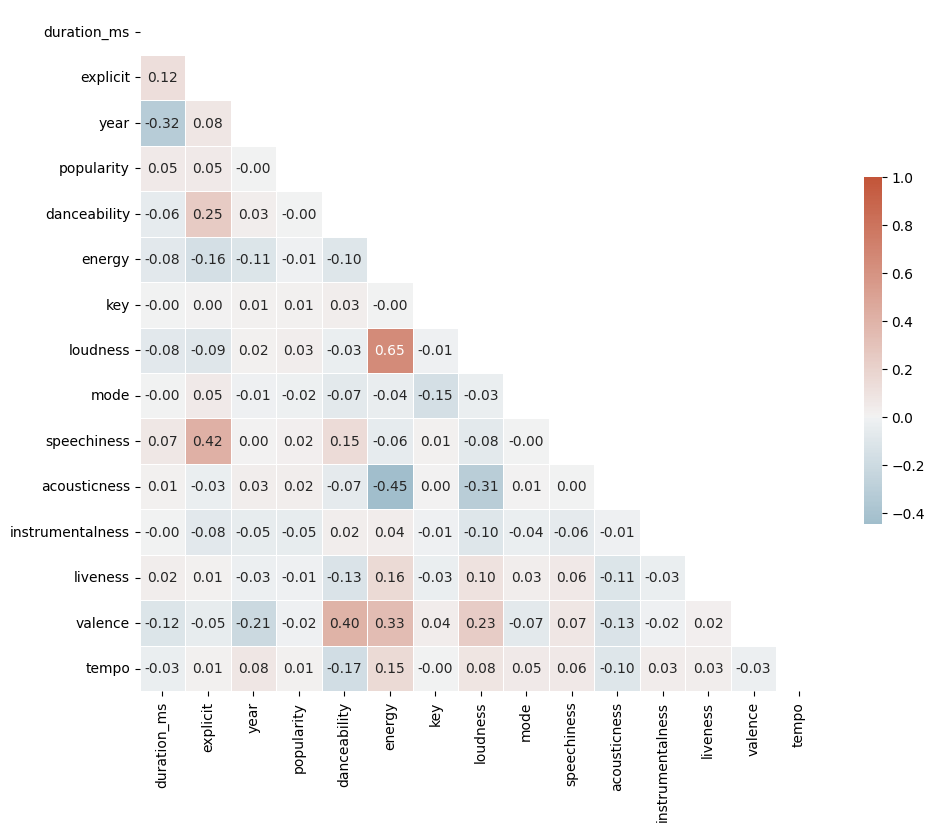

In [6]:
### 3. Find a list attributes that makes some more og less popular
# Find the correlation matrix
corr = df_music.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')




<Axes: xlabel='loudness', ylabel='energy'>

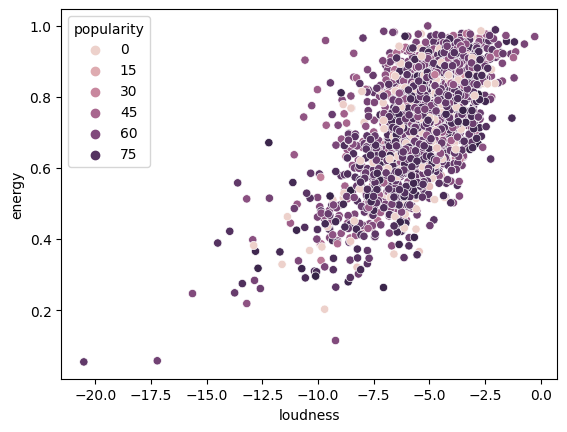

In [8]:
# From the correlation matrix, we can see that loudness and energy are highly correlated
# Plotting
sns.scatterplot(x='loudness', y='energy', data=df_music, hue='popularity')

In [14]:
### 4. What genre inbetween between 1999 og 2000 was most popular and what was the tempo in the songs
# Filter for year 1999 and 2000
df_music_99_00 = df_music.loc[(df_music['year'] == 1999) | (df_music['year'] == 2000)]

#The most popular genre
df_music_99_00.groupby('genre')['popularity'].mean().sort_values(ascending=False).head()

#Tempo of the most popular song
df_music_99_00.loc[df_music_99_00['popularity'] == df_music_99_00['popularity'].max(), 'tempo']



print(df_music_99_00.loc[df_music_99_00['popularity'] == df_music_99_00['popularity'].max(), 'tempo'].values[0])


#Mean tempo for the most popular genres
df_music_99_00.groupby('genre')['tempo'].mean().sort_values(ascending=False).head()

104.504


genre
rock, pop, metal       152.034000
hip hop, R&B           151.181000
pop, latin             143.947333
pop, country           136.859000
hip hop, pop, latin    134.922500
Name: tempo, dtype: float64